In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
import re
import nltk
import math
import os
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [2]:
## data from HotStuff.csv taken from https://data.world/kcmillersean/billboard-hot-100-1958-2017

In [3]:
df_1 = pd.read_csv('song_data.csv')
df_1.head(3)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.00817,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324


In [4]:
df_1.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

In [5]:
df_1.shape

(18835, 15)

In [6]:
df_2 = pd.read_csv('song_info.csv')
df_2.head(3)

,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems


In [7]:
df_2.columns

Index(['song_name', 'artist_name', 'album_names', 'playlist'], dtype='object')

In [8]:
df_2.shape

(18835, 4)

In [9]:
df_3 = pd.read_csv('BillboardTop100.csv')
df_3.head(3)

,year,year_rank,group,artist,song_name,id
0,1956.0,1.0,Elvis Presley,Elvis Presley,Heartbreak Hotel,1
1,1956.0,2.0,Elvis Presley,Elvis Presley,Don't Be Cruel,2
2,1956.0,3.0,Nelson Riddle,Nelson Riddle,Lisbon Antigua,3


In [10]:
df_3.columns

Index(['year', 'year_rank', 'group', 'artist', 'song_name', 'id'], dtype='object')

In [11]:
df_3.shape

(6476, 6)

In [12]:
df_hs = pd.read_csv('HotStuff.csv')
df_hs.head(3)

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1990-0...,2/10/1990,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1
1,http://www.billboard.com/charts/hot-100/1990-0...,2/17/1990,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2
2,http://www.billboard.com/charts/hot-100/1990-0...,2/24/1990,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3


In [13]:
df_hs.columns

Index(['url', 'WeekID', 'Week Position', 'Song', 'Performer', 'SongID',
       'Instance', 'Previous Week Position', 'Peak Position',
       'Weeks on Chart'],
      dtype='object')

In [14]:
df_hs.shape

(317795, 10)

In [15]:
df_hs.columns = ['url', 'WeekID', 'Week Position', 'song_name', 'artist', 'SongID',
       'Instance', 'Previous Week Position', 'Peak_Position',
       'Weeks on Chart']

In [16]:
df_hs.head(3)

,url,WeekID,Week Position,song_name,artist,SongID,Instance,Previous Week Position,Peak_Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1990-0...,2/10/1990,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1
1,http://www.billboard.com/charts/hot-100/1990-0...,2/17/1990,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2
2,http://www.billboard.com/charts/hot-100/1990-0...,2/24/1990,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3


In [17]:
df_4 = pd.merge(df_1, df_2, on='song_name')
df_4.head(10)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Green Day,Boulevard Of Broken Dreams,Life Sucks
2,Boulevard of Broken Dreams,71,261266,0.00394,0.490,0.679,0.000015,8,0.0383,-3.680,1,0.0309,167.046,4,0.506,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
3,Boulevard of Broken Dreams,71,261266,0.00394,0.490,0.679,0.000015,8,0.0383,-3.680,1,0.0309,167.046,4,0.506,Green Day,Boulevard Of Broken Dreams,Life Sucks
4,In The End,66,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Linkin Park,Hybrid Theory,00s Rock Anthems
5,Seven Nation Army,76,231733,0.00817,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,The White Stripes,Elephant,00s Rock Anthems
6,Seven Nation Army,76,231733,0.00817,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,Zella Day,Seven Nation Army,Acoustic Covers
7,Seven Nation Army,76,231733,0.00817,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,The White Stripes,Elephant,All Out 00s
8,Seven Nation Army,76,231733,0.00817,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,The White Stripes,Elephant,Alternative 00s
9,Seven Nation Army,76,231733,0.00817,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,The White Stripes,Elephant,Endorphin Rush


In [18]:
df_4.shape

(46411, 18)

In [19]:
df_4.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence', 'artist_name', 'album_names', 'playlist'],
      dtype='object')

In [20]:
df_4.columns = ['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence', 'artist', 'album_names', 'playlist']

In [21]:
df = pd.merge(df_hs, df_4, on=['song_name','artist'])
df.head(5)

,url,WeekID,Week Position,song_name,artist,SongID,Instance,Previous Week Position,Peak_Position,Weeks on Chart,...,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,album_names,playlist
0,http://www.billboard.com/charts/hot-100/1990-0...,2/10/1990,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1,...,1,0.0373,-11.226,1,0.0422,111.574,4,0.814,Jane Child,Way Back Workout
1,http://www.billboard.com/charts/hot-100/1990-0...,2/17/1990,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2,...,1,0.0373,-11.226,1,0.0422,111.574,4,0.814,Jane Child,Way Back Workout
2,http://www.billboard.com/charts/hot-100/1990-0...,2/24/1990,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3,...,1,0.0373,-11.226,1,0.0422,111.574,4,0.814,Jane Child,Way Back Workout
3,http://www.billboard.com/charts/hot-100/1990-0...,3/3/1990,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4,...,1,0.0373,-11.226,1,0.0422,111.574,4,0.814,Jane Child,Way Back Workout
4,http://www.billboard.com/charts/hot-100/1990-0...,3/10/1990,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5,...,1,0.0373,-11.226,1,0.0422,111.574,4,0.814,Jane Child,Way Back Workout


In [22]:
df.tail(15)

,url,WeekID,Week Position,song_name,artist,SongID,Instance,Previous Week Position,Peak_Position,Weeks on Chart,...,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,album_names,playlist
217673,https://www.billboard.com/charts/hot-100/2018-...,7/7/2018,90,Zombie,Bad Wolves,ZombieBad Wolves,1,93.0,54,16,...,4,0.552,-4.341,1,0.0633,145.053,4,0.709,Zombie,Hard Rock Workout
217674,https://www.billboard.com/charts/hot-100/2018-...,7/7/2018,90,Zombie,Bad Wolves,ZombieBad Wolves,1,93.0,54,16,...,2,0.117,-3.244,0,0.0319,77.093,4,0.190,Zombie,Hard Rock Workout
217675,https://www.billboard.com/charts/hot-100/2018-...,7/7/2018,90,Zombie,Bad Wolves,ZombieBad Wolves,1,93.0,54,16,...,4,0.493,-4.639,1,0.0729,145.205,4,0.678,Zombie,Hard Rock Workout
217676,https://www.billboard.com/charts/hot-100/2018-...,7/14/2018,95,Zombie,Bad Wolves,ZombieBad Wolves,1,90.0,54,17,...,7,0.368,-9.012,1,0.0347,166.960,4,0.306,Zombie,Hard Rock Workout
217677,https://www.billboard.com/charts/hot-100/2018-...,7/14/2018,95,Zombie,Bad Wolves,ZombieBad Wolves,1,90.0,54,17,...,2,0.302,-5.115,0,0.1710,131.690,4,0.584,Zombie,Hard Rock Workout
217678,https://www.billboard.com/charts/hot-100/2018-...,7/14/2018,95,Zombie,Bad Wolves,ZombieBad Wolves,1,90.0,54,17,...,7,0.368,-9.012,1,0.0347,166.960,4,0.306,Zombie,Hard Rock Workout
217679,https://www.billboard.com/charts/hot-100/2018-...,7/14/2018,95,Zombie,Bad Wolves,ZombieBad Wolves,1,90.0,54,17,...,4,0.552,-4.341,1,0.0633,145.053,4,0.709,Zombie,Hard Rock Workout
217680,https://www.billboard.com/charts/hot-100/2018-...,7/14/2018,95,Zombie,Bad Wolves,ZombieBad Wolves,1,90.0,54,17,...,2,0.117,-3.244,0,0.0319,77.093,4,0.190,Zombie,Hard Rock Workout
217681,https://www.billboard.com/charts/hot-100/2018-...,7/14/2018,95,Zombie,Bad Wolves,ZombieBad Wolves,1,90.0,54,17,...,4,0.493,-4.639,1,0.0729,145.205,4,0.678,Zombie,Hard Rock Workout
217682,https://www.billboard.com/charts/hot-100/2018-...,7/28/2018,97,Zombie,Bad Wolves,ZombieBad Wolves,2,NaN,97,18,...,7,0.368,-9.012,1,0.0347,166.960,4,0.306,Zombie,Hard Rock Workout


In [23]:
df.shape

(217688, 26)

In [24]:
df.columns

Index(['url', 'WeekID', 'Week Position', 'song_name', 'artist', 'SongID',
       'Instance', 'Previous Week Position', 'Peak_Position', 'Weeks on Chart',
       'song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'album_names', 'playlist'],
      dtype='object')

In [25]:
df.Peak_Position.value_counts()

1      31563
2      12191
6      11383
3      11055
4       8680
8       7292
5       6680
7       5430
13      4947
29      4801
11      4549
9       4400
18      4322
34      4163
10      4058
23      3468
12      3444
44      3342
22      2876
16      2661
21      2540
45      2383
24      2341
53      2178
14      2174
20      2107
27      2091
40      1927
30      1865
15      1750
       ...  
47       668
71       654
38       641
50       634
49       598
83       594
84       588
59       537
91       522
89       513
58       503
90       502
68       499
92       490
79       490
100      486
74       455
78       434
96       430
94       412
86       411
88       368
87       349
77       340
85       323
97       298
99       279
93       275
98       265
95       243
Name: Peak_Position, Length: 100, dtype: int64

In [26]:
df.columns

Index(['url', 'WeekID', 'Week Position', 'song_name', 'artist', 'SongID',
       'Instance', 'Previous Week Position', 'Peak_Position', 'Weeks on Chart',
       'song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'album_names', 'playlist'],
      dtype='object')

In [27]:
df.dtypes

url                        object
WeekID                     object
Week Position               int64
song_name                  object
artist                     object
SongID                     object
Instance                    int64
Previous Week Position    float64
Peak_Position               int64
Weeks on Chart              int64
song_popularity             int64
song_duration_ms            int64
acousticness              float64
danceability              float64
energy                    float64
instrumentalness          float64
key                         int64
liveness                  float64
loudness                  float64
audio_mode                  int64
speechiness               float64
tempo                     float64
time_signature              int64
audio_valence             float64
album_names                object
playlist                   object
dtype: object

In [28]:
df.isnull().sum()

url                           0
WeekID                        0
Week Position                 0
song_name                     0
artist                        0
SongID                        0
Instance                      0
Previous Week Position    10580
Peak_Position                 0
Weeks on Chart                0
song_popularity               0
song_duration_ms              0
acousticness                  0
danceability                  0
energy                        0
instrumentalness              0
key                           0
liveness                      0
loudness                      0
audio_mode                    0
speechiness                   0
tempo                         0
time_signature                0
audio_valence                 0
album_names                   0
playlist                      0
dtype: int64

In [29]:
predictors = ['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
              'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
              'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']


In [30]:
# Group by year
df_group = df.groupby(['song_name'])

In [31]:
df_group.Peak_Position.min()

song_name
#SELFIE                                              16
(I Can't Get No) Satisfaction                         1
(I Just) Died In Your Arms                            1
(If Loving You Is Wrong) I Don't Want To Be Right    31
(Sittin' On) The Dock Of The Bay                      1
(There's Gotta Be) More To Life                      30
...Baby One More Time                                 1
16 Candles                                            2
18 And Life                                           4
1901                                                 84
1942 Flows                                           83
1979                                                 12
1985                                                 23
22                                                   20
24K Magic                                             4
44 More                                              22
6 Underground                                        45
7 Days                                

In [32]:
df_group.Peak_Position.max()

song_name
#SELFIE                                               55
(I Can't Get No) Satisfaction                         67
(I Just) Died In Your Arms                            80
(If Loving You Is Wrong) I Don't Want To Be Right     88
(Sittin' On) The Dock Of The Bay                      67
(There's Gotta Be) More To Life                       84
...Baby One More Time                                 17
16 Candles                                            91
18 And Life                                           91
1901                                                  99
1942 Flows                                            83
1979                                                  20
1985                                                  72
22                                                    84
24K Magic                                              5
44 More                                               22
6 Underground                                         94
7 Days               

In [33]:
hug = df_group.Peak_Position.min()
hug

song_name
#SELFIE                                              16
(I Can't Get No) Satisfaction                         1
(I Just) Died In Your Arms                            1
(If Loving You Is Wrong) I Don't Want To Be Right    31
(Sittin' On) The Dock Of The Bay                      1
(There's Gotta Be) More To Life                      30
...Baby One More Time                                 1
16 Candles                                            2
18 And Life                                           4
1901                                                 84
1942 Flows                                           83
1979                                                 12
1985                                                 23
22                                                   20
24K Magic                                             4
44 More                                              22
6 Underground                                        45
7 Days                                

In [34]:
type(hug)

pandas.core.series.Series

In [35]:
df_hug = hug.to_frame()
df_hug.head()

,Peak_Position
song_name,
#SELFIE,16
(I Can't Get No) Satisfaction,1
(I Just) Died In Your Arms,1
(If Loving You Is Wrong) I Don't Want To Be Right,31
(Sittin' On) The Dock Of The Bay,1


In [36]:
df_hug.dtypes

Peak_Position    int64
dtype: object

In [37]:
df_hug = df_hug.reset_index()
df_hug.head(23)

,song_name,Peak_Position
0,#SELFIE,16
1,(I Can't Get No) Satisfaction,1
2,(I Just) Died In Your Arms,1
3,(If Loving You Is Wrong) I Don't Want To Be Right,31
4,(Sittin' On) The Dock Of The Bay,1
5,(There's Gotta Be) More To Life,30
6,...Baby One More Time,1
7,16 Candles,2
8,18 And Life,4
9,1901,84


In [38]:
hug.index

Index(['#SELFIE', '(I Can't Get No) Satisfaction',
       '(I Just) Died In Your Arms',
       '(If Loving You Is Wrong) I Don't Want To Be Right',
       '(Sittin' On) The Dock Of The Bay', '(There's Gotta Be) More To Life',
       '...Baby One More Time', '16 Candles', '18 And Life', '1901',
       ...
       'You're The First, The Last, My Everything', 'You've Got A Friend',
       'You've Never Been This Far Before', 'Young Dumb & Broke', 'Your Love',
       'Your Love Is King', 'Your Woman', 'Youth Of The Nation', 'Zombie',
       'idontwannabeyouanymore'],
      dtype='object', name='song_name', length=1398)

In [39]:
df_hug.shape

(1398, 2)

In [40]:
df_hug.columns

Index(['song_name', 'Peak_Position'], dtype='object')

In [41]:
df.columns

Index(['url', 'WeekID', 'Week Position', 'song_name', 'artist', 'SongID',
       'Instance', 'Previous Week Position', 'Peak_Position', 'Weeks on Chart',
       'song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'album_names', 'playlist'],
      dtype='object')

In [42]:
my_columns = ['song_name', 'artist', ##'Weeks on Chart',
              'song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
              'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
              'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence',
              'album_names', 'playlist']

In [43]:
df_trunc = df[my_columns]
df_trunc.head()

,song_name,artist,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,album_names,playlist
0,Don't Wanna Fall In Love,Jane Child,47,247840,0.0152,0.708,0.681,0.000034,1,0.0373,-11.226,1,0.0422,111.574,4,0.814,Jane Child,Way Back Workout
1,Don't Wanna Fall In Love,Jane Child,47,247840,0.0152,0.708,0.681,0.000034,1,0.0373,-11.226,1,0.0422,111.574,4,0.814,Jane Child,Way Back Workout
2,Don't Wanna Fall In Love,Jane Child,47,247840,0.0152,0.708,0.681,0.000034,1,0.0373,-11.226,1,0.0422,111.574,4,0.814,Jane Child,Way Back Workout
3,Don't Wanna Fall In Love,Jane Child,47,247840,0.0152,0.708,0.681,0.000034,1,0.0373,-11.226,1,0.0422,111.574,4,0.814,Jane Child,Way Back Workout
4,Don't Wanna Fall In Love,Jane Child,47,247840,0.0152,0.708,0.681,0.000034,1,0.0373,-11.226,1,0.0422,111.574,4,0.814,Jane Child,Way Back Workout


In [44]:
songs = pd.merge(df_hug, df_trunc, on=['song_name'])
songs.head()

,song_name,Peak_Position,artist,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,album_names,playlist
0,#SELFIE,16,The Chainsmokers,27,183750,0.0136,0.808,0.915,0.000009,0,0.0788,-3.277,1,0.233,127.984,4,0.647,#SELFIE,Spin Class
1,#SELFIE,16,The Chainsmokers,27,183750,0.0136,0.808,0.915,0.000009,0,0.0788,-3.277,1,0.233,127.984,4,0.647,#SELFIE,Spin Class
2,#SELFIE,16,The Chainsmokers,27,183750,0.0136,0.808,0.915,0.000009,0,0.0788,-3.277,1,0.233,127.984,4,0.647,#SELFIE,Spin Class
3,#SELFIE,16,The Chainsmokers,27,183750,0.0136,0.808,0.915,0.000009,0,0.0788,-3.277,1,0.233,127.984,4,0.647,#SELFIE,Spin Class
4,#SELFIE,16,The Chainsmokers,27,183750,0.0136,0.808,0.915,0.000009,0,0.0788,-3.277,1,0.233,127.984,4,0.647,#SELFIE,Spin Class


In [45]:
songs.tail()

,song_name,Peak_Position,artist,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,album_names,playlist
217683,Zombie,54,Bad Wolves,78,254805,0.00756,0.448,0.826,0.0,2,0.117,-3.244,0,0.0319,77.093,4,0.190,Zombie,Hard Rock Workout
217684,Zombie,54,Bad Wolves,1,246186,0.01350,0.546,0.911,0.0,4,0.493,-4.639,1,0.0729,145.205,4,0.678,Zombie,Hard Rock Workout
217685,idontwannabeyouanymore,96,Billie Eilish,86,203569,0.73700,0.483,0.412,0.0,7,0.116,-8.461,1,0.0402,170.163,3,0.247,dont smile at me,Down In The Dumps
217686,idontwannabeyouanymore,96,Billie Eilish,86,203569,0.73700,0.483,0.412,0.0,7,0.116,-8.461,1,0.0402,170.163,3,0.247,dont smile at me,Down In The Dumps
217687,idontwannabeyouanymore,96,Billie Eilish,86,203569,0.73700,0.483,0.412,0.0,7,0.116,-8.461,1,0.0402,170.163,3,0.247,dont smile at me,Down In The Dumps


In [46]:
songs.shape

(217688, 19)

## Remove duplicates from dataframe

In [47]:
songs = songs.drop_duplicates()

In [48]:
songs.head()

,song_name,Peak_Position,artist,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,album_names,playlist
0,#SELFIE,16,The Chainsmokers,27,183750,0.01360,0.808,0.915,0.000009,0,0.0788,-3.277,1,0.2330,127.984,4,0.647,#SELFIE,Spin Class
11,(I Can't Get No) Satisfaction,1,The Rolling Stones,48,222746,0.00038,0.735,0.820,0.057200,2,0.0983,-8.554,1,0.0494,135.586,4,0.859,Hot Rocks (1964-1971) [Remastered],60s Rock Anthems
25,(I Just) Died In Your Arms,1,Cutting Crew,69,280400,0.01580,0.625,0.726,0.000169,11,0.0625,-11.402,0,0.0444,124.945,4,0.507,Broadcast,80s Love Songs
26,(I Just) Died In Your Arms,1,Cutting Crew,69,280400,0.01580,0.625,0.726,0.000169,11,0.0625,-11.402,0,0.0444,124.945,4,0.507,The Best Of Cutting Crew,All Out 80s
27,(I Just) Died In Your Arms,1,Cutting Crew,72,278626,0.01190,0.632,0.727,0.000076,11,0.0678,-11.209,0,0.0438,124.919,4,0.499,Broadcast,80s Love Songs


In [49]:
songs.tail()

,song_name,Peak_Position,artist,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,album_names,playlist
217578,Zombie,54,Bad Wolves,30,745653,0.38800,0.704,0.942,0.0147,2,0.302,-5.115,0,0.1710,131.690,4,0.584,Zombie,Hard Rock Workout
217580,Zombie,54,Bad Wolves,63,246186,0.01330,0.546,0.912,0.0000,4,0.552,-4.341,1,0.0633,145.053,4,0.709,Zombie,Hard Rock Workout
217581,Zombie,54,Bad Wolves,78,254805,0.00756,0.448,0.826,0.0000,2,0.117,-3.244,0,0.0319,77.093,4,0.190,Zombie,Hard Rock Workout
217582,Zombie,54,Bad Wolves,1,246186,0.01350,0.546,0.911,0.0000,4,0.493,-4.639,1,0.0729,145.205,4,0.678,Zombie,Hard Rock Workout
217685,idontwannabeyouanymore,96,Billie Eilish,86,203569,0.73700,0.483,0.412,0.0000,7,0.116,-8.461,1,0.0402,170.163,3,0.247,dont smile at me,Down In The Dumps


In [50]:
songs.shape

(4652, 19)

In [51]:
songs.isnull().sum()

song_name           0
Peak_Position       0
artist              0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
album_names         0
playlist            0
dtype: int64

In [52]:
songs.columns

Index(['song_name', 'Peak_Position', 'artist', 'song_popularity',
       'song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'album_names', 'playlist'],
      dtype='object')

## Create A Categorical Variable From A Integer Variable For Classification

In [53]:
def billboard_rank(rank):
    if rank > 10:
        return 'Other'
    else:
        return 'Top10'

In [54]:
# convert variable (Peak_Position) into A Categorical Feature/Variable, 'type',
# for classification

songs['type'] = songs['Peak_Position'].apply(billboard_rank)

songs.type.head()

songs.type.value_counts()

Top10    2663
Other    1989
Name: type, dtype: int64

In [55]:
songs.columns

Index(['song_name', 'Peak_Position', 'artist', 'song_popularity',
       'song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'album_names', 'playlist', 'type'],
      dtype='object')

In [56]:
songs.head()

,song_name,Peak_Position,artist,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,album_names,playlist,type
0,#SELFIE,16,The Chainsmokers,27,183750,0.01360,0.808,0.915,0.000009,0,0.0788,-3.277,1,0.2330,127.984,4,0.647,#SELFIE,Spin Class,Other
11,(I Can't Get No) Satisfaction,1,The Rolling Stones,48,222746,0.00038,0.735,0.820,0.057200,2,0.0983,-8.554,1,0.0494,135.586,4,0.859,Hot Rocks (1964-1971) [Remastered],60s Rock Anthems,Top10
25,(I Just) Died In Your Arms,1,Cutting Crew,69,280400,0.01580,0.625,0.726,0.000169,11,0.0625,-11.402,0,0.0444,124.945,4,0.507,Broadcast,80s Love Songs,Top10
26,(I Just) Died In Your Arms,1,Cutting Crew,69,280400,0.01580,0.625,0.726,0.000169,11,0.0625,-11.402,0,0.0444,124.945,4,0.507,The Best Of Cutting Crew,All Out 80s,Top10
27,(I Just) Died In Your Arms,1,Cutting Crew,72,278626,0.01190,0.632,0.727,0.000076,11,0.0678,-11.209,0,0.0438,124.919,4,0.499,Broadcast,80s Love Songs,Top10


In [57]:
songs.dtypes

song_name            object
Peak_Position         int64
artist               object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
album_names          object
playlist             object
type                 object
dtype: object

## EDA

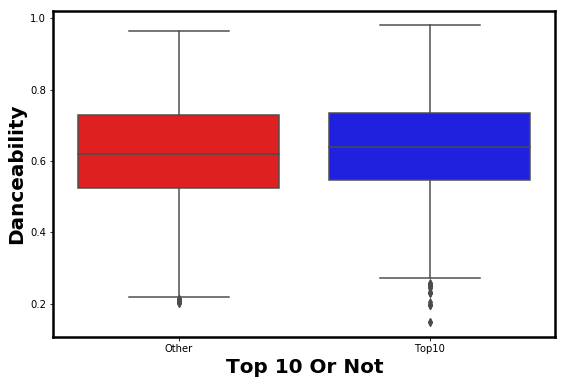

In [58]:
my_pal = {"Other": "r", "Top10": "b"}
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.boxplot(x="type", y="danceability", data= songs, palette=my_pal)
plt.xlabel('Top 10 Or Not',weight = 'bold',size =20)
plt.ylabel('Danceability',weight = 'bold',size =20)

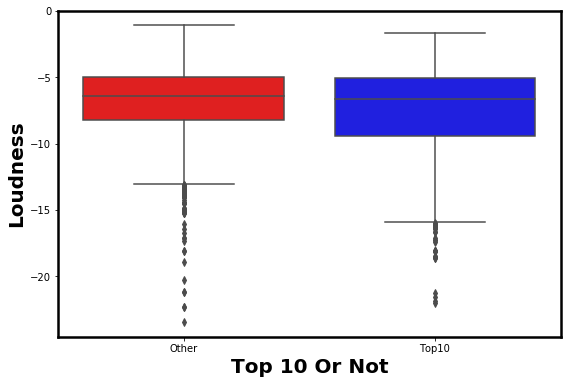

In [59]:
my_pal = {"Other": "r", "Top10": "b"}
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.boxplot(x="type", y="loudness", data= songs, palette=my_pal)
plt.xlabel('Top 10 Or Not',weight = 'bold',size =20)
plt.ylabel('Loudness',weight = 'bold',size =20)

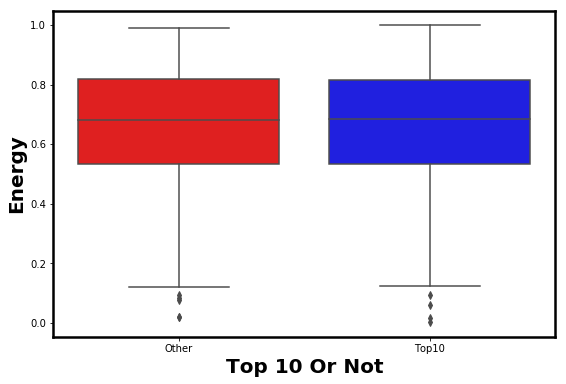

In [60]:
my_pal = {"Other": "r", "Top10": "b"}
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.boxplot(x="type", y="energy", data= songs, palette=my_pal)
plt.xlabel('Top 10 Or Not',weight = 'bold',size =20)
plt.ylabel('Energy',weight = 'bold',size =20)

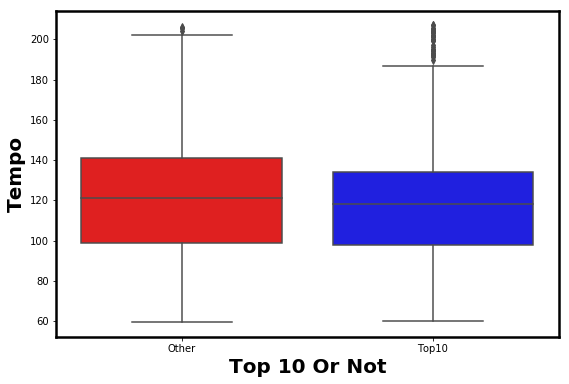

In [61]:
my_pal = {"Other": "r", "Top10": "b"}
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.boxplot(x="type", y="tempo", data= songs, palette=my_pal)
plt.xlabel('Top 10 Or Not',weight = 'bold',size =20)
plt.ylabel('Tempo',weight = 'bold',size =20)

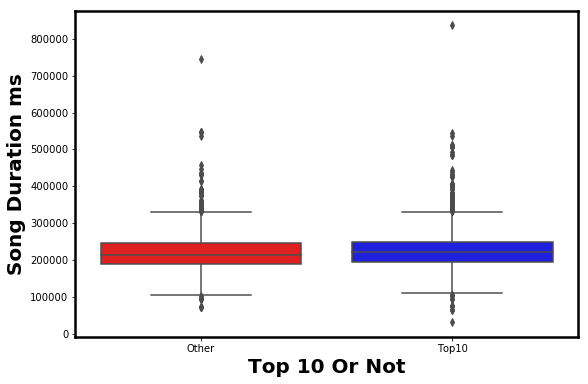

In [62]:
my_pal = {"Other": "r", "Top10": "b"}
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.boxplot(x="type", y="song_duration_ms", data= songs, palette=my_pal)
plt.xlabel('Top 10 Or Not',weight = 'bold',size =20)
plt.ylabel('Song Duration ms',weight = 'bold',size =20)

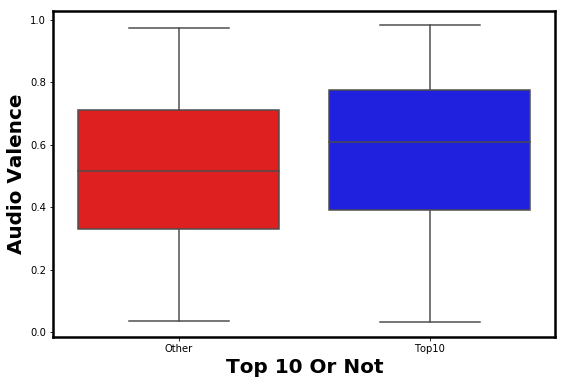

In [63]:
my_pal = {"Other": "r", "Top10": "b"}
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.boxplot(x="type", y="audio_valence", data= songs, palette=my_pal)
plt.xlabel('Top 10 Or Not',weight = 'bold',size =20)
plt.ylabel('Audio Valence',weight = 'bold',size =20)

In [64]:
songs.columns

Index(['song_name', 'Peak_Position', 'artist', 'song_popularity',
       'song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'album_names', 'playlist', 'type'],
      dtype='object')

## Classification: Predict whether a song is a Top 10 song or not.

In [65]:
#predictors = ['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
              #'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
              #'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']

predictors = ['song_duration_ms', 'acousticness', 'danceability',
              'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
              'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']

X = songs[predictors]
y = songs.type

In [66]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3721, 13) (3721,)
(931, 13) (931,)


## KNN Classifier

In [67]:
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train) 

# print knn score
print("Score: {:.2f}".format(knn.score(X_test, y_test)))

Score: 0.76


In [68]:
training_accuracy = []
test_accuracy = []
# We define a range of 1 to 10 (included) neighbors that will be tested
neighbors_settings = range(1,21,2)

# We loop the KNN model through the range of possible neighbors to evaluate which one would be 
# appropriate for this analysis

for n_neighbors in neighbors_settings:
    print(n_neighbors)
    # creating the KNN classifier
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    # fitting the model
    clf.fit(X_train, y_train)
    #recording the accuracy of the training set
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    #recording the accuracy of the test set
    print(clf.score(X_test, y_test))
    print()
    

1
0.885069817401

3
0.800214822771

5
0.761546723953

7
0.740064446831

9
0.719656283566

11
0.701396348013

13
0.699248120301

15
0.687432867884

17
0.687432867884

19
0.677765843179



In [69]:
test_accuracy

[0.8850698174006445,
 0.8002148227712137,
 0.76154672395273904,
 0.74006444683136408,
 0.71965628356605804,
 0.70139634801288941,
 0.6992481203007519,
 0.68743286788399571,
 0.68743286788399571,
 0.67776584317937705]

## Multilayer Perceptron Classifier

In [70]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier().fit(X_train,y_train)

# print MLP score
print("Score: {:.2f}".format(mlp.score(X_test, y_test)))

Score: 0.59


## Logistic Regression

In [71]:
# Logistic Regression for prediction
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print("Score: {:.2f}".format(lr.score(X_test, y_test)))

Score: 0.60


In [72]:
# Try optimizing Logistic Regression model
#the grid of parameters to search over
Cs = [0.001,0.01, 0.1, 1, 10, 100]

Scores = []

for item in Cs:
    clf = LogisticRegression(C=item)
    clf.fit(X_train, y_train)
    Scores.append((clf.score(X_test, y_test)))
    
Scores

[0.59613319011815258,
 0.59613319011815258,
 0.59613319011815258,
 0.59613319011815258,
 0.59613319011815258,
 0.59613319011815258]

## Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
predictions = dtc.predict(X_test)
print("Score: {:.2f}".format(dtc.score(X_test, y_test)))

Score: 0.89


In [74]:
predictions

array(['Top10', 'Other', 'Top10', 'Other', 'Top10', 'Top10', 'Other',
       'Other', 'Other', 'Top10', 'Top10', 'Top10', 'Top10', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Top10', 'Other', 'Other',
       'Other', 'Other', 'Top10', 'Other', 'Top10', 'Other', 'Top10',
       'Top10', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Top10', 'Other', 'Top10', 'Top10', 'Top10', 'Top10', 'Top10',
       'Other', 'Top10', 'Top10', 'Other', 'Other', 'Top10', 'Top10',
       'Top10', 'Top10', 'Top10', 'Top10', 'Other', 'Other', 'Other',
       'Top10', 'Top10', 'Other', 'Other', 'Top10', 'Top10', 'Other',
       'Top10', 'Top10', 'Top10', 'Top10', 'Other', 'Top10', 'Top10',
       'Top10', 'Other', 'Other', 'Top10', 'Other', 'Other', 'Top10',
       'Top10', 'Other', 'Top10', 'Other', 'Top10', 'Other', 'Other',
       'Top10', 'Other', 'Top10', 'Top10', 'Top10', 'Top10', 'Top10',
       'Other', 'Top10', 'Other', 'Top10', 'Other', 'Top10', 'Other',
       'Top10', 'Oth